In [1]:
import chemprop
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from pymatgen.core import Molecule
from rdkit.Chem import rdChemReactions
from rdkit import Chem

In [2]:
file_train = "../../dataset/HEPOM/Filtered_train_set_alchemy_qm9.json"
file_test = "../../dataset/HEPOM/Filtered_test_set_alchemy_qm9.json"
train_df = pd.read_json(file_train)
test_df = pd.read_json(file_test)

In [8]:
def add_atom_mapping(mol):
    for i, atom in enumerate(mol.GetAtoms()):
        # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
        atom.SetProp("molAtomMapNumber", str(atom.GetIdx() + 1))


def get_reaction_smarts_from_df(df):
    label_list = []
    reaction_list = []
    reactant_mols = []
    product_mols = []
    success_reactant_dict = []
    success_product_dict = []
    reactant_smi_test =[]
    product_smi_test=[]
    function_group_list_test=[]

    works_count = 0
    for ind, row in df.iterrows():
        label = row["dG_sp"]
        combined_products_graph = row["combined_products_graph"]
        combined_reactants_graph = row["combined_reactants_graph"]
        pmg_prod = Molecule.from_dict(row.combined_products_graph["molecule"])
        pmg_react = Molecule.from_dict(row.combined_reactants_graph["molecule"])
        reactants_xyz = pmg_react.to(fmt="sdf")
        product_xyz = pmg_prod.to(fmt="sdf")
        mol_reactants = Chem.MolFromMolBlock(
            reactants_xyz, removeHs=False, sanitize=True
        )
        mol_products = Chem.MolFromMolBlock(product_xyz, removeHs=False, sanitize=True)

        if mol_reactants is not None and mol_products is not None:
            add_atom_mapping(mol_reactants)
            add_atom_mapping(mol_products)
            success_product_dict.append(combined_products_graph["molecule"])
            success_reactant_dict.append(combined_reactants_graph["molecule"])

            rxn = rdChemReactions.ReactionFromSmarts(
                ">>", useSmiles=True
            )  # You need to provide a valid reaction SMARTS here

            rxn.AddReactantTemplate(mol_reactants)
            rxn.AddProductTemplate(mol_products)
            # rxn_block = rdChemReactions.ReactionToRxnBlock(rxn)
            # mapped_rxn = rdChemReactions.MapReaction(rxn)
            # rxn_smiles_mapped = rdChemReactions.ReactionToSmarts(
            #    rxn,
            # )
            rxn_smiles_mapped = rdChemReactions.ReactionToSmiles(rxn)
            rxn_smiles_mapped_manual = (
                Chem.MolToSmiles(mol_reactants) + ">>" + Chem.MolToSmiles(mol_products)
            )
            works_count += 1

            reactant_mols.append(mol_reactants)
            product_mols.append(mol_products)
            reaction_list.append(rxn_smiles_mapped_manual)
            label_list.append(label)
            reactant_smi_test.append(row["reactant_smiles"])
            product_smi_test.append(row["product_smiles"])
            function_group_list_test.append(row["functional_group_reacted"])

    print("works_count: ", works_count)
    assert len(reaction_list) == len(label_list)

    return (
        reaction_list,
        reactant_smi_test, 
        product_smi_test,
        function_group_list_test,
        reactant_mols,
        product_mols,
        label_list,
        success_reactant_dict,
        success_product_dict,
    )




def get_reaction_smarts_from_df_mg(df):
    label_list = []
    reaction_list = []
    reactant_mols = []
    product_mols = []
    success_reactant_dict = []
    success_product_dict = []
    reactant_smi_test =[]
    product_smi_test=[]
    function_group_list_test=[]

    works_count = 0
    for ind, row in df.iterrows():
        label = row["dG_sp"]
        combined_products_graph = row["combined_products_graph"]
        combined_reactants_graph = row["combined_reactants_graph"]
        pmg_prod = Molecule.from_dict(row.combined_products_graph["molecule"])
        pmg_react = Molecule.from_dict(row.combined_reactants_graph["molecule"])
        reactants_xyz = pmg_react.to(fmt="sdf")
        product_xyz = pmg_prod.to(fmt="sdf")
        mol_reactants = Chem.MolFromMolBlock(
            reactants_xyz, removeHs=False, sanitize=True
        )
        mol_products = Chem.MolFromMolBlock(product_xyz, removeHs=False, sanitize=True)

        if mol_reactants is not None and mol_products is not None:
            add_atom_mapping(mol_reactants)
            add_atom_mapping(mol_products)
            success_product_dict.append(combined_products_graph["molecule"])
            success_reactant_dict.append(combined_reactants_graph["molecule"])

            rxn = rdChemReactions.ReactionFromSmarts(
                ">>", useSmiles=True
            )  # You need to provide a valid reaction SMARTS here

            rxn.AddReactantTemplate(mol_reactants)
            rxn.AddProductTemplate(mol_products)
            # rxn_block = rdChemReactions.ReactionToRxnBlock(rxn)
            # mapped_rxn = rdChemReactions.MapReaction(rxn)
            # rxn_smiles_mapped = rdChemReactions.ReactionToSmarts(
            #    rxn,
            # )
            rxn_smiles_mapped = rdChemReactions.ReactionToSmiles(rxn)
            rxn_smiles_mapped_manual = (
                Chem.MolToSmiles(mol_reactants) + ">>" + Chem.MolToSmiles(mol_products)
            )
            works_count += 1

            reactant_mols.append(mol_reactants)
            product_mols.append(mol_products)
            reaction_list.append(rxn_smiles_mapped_manual)
            label_list.append(label)
            reactant_smi_test.append(row["reactant_smiles"])
            product_smi_test.append(row["product_smiles"])
            function_group_list_test.append(row["functional_group_reacted"])

    print("works_count: ", works_count)
    assert len(reaction_list) == len(label_list)

    return (
        reaction_list,
        reactant_smi_test, 
        product_smi_test,
        function_group_list_test,
        reactant_mols,
        product_mols,
        label_list,
        success_reactant_dict,
        success_product_dict,
    )

In [11]:
(
    reaction_list_test,
    reactant_smi_test, 
    product_smi_test,
    function_group_list_test,
    reactant_mols_test,
    product_mols_test,
    label_list_test_test,
    success_reactant_dict_test,
    success_product_dict_test,
) = get_reaction_smarts_from_df(test_df)


(
    reaction_list_train,
    reactant_smi_train, 
    product_smi_train,
    function_group_list_train,
    reactant_mols_train,
    product_mols_train,
    label_list_train,
    success_reactant_dict_train,
    success_product_dict_train,
) = get_reaction_smarts_from_df(train_df)

[10:12:27] Explicit valence for atom # 13 N, 4, is greater than permitted
[10:12:27] Explicit valence for atom # 15 N, 4, is greater than permitted
[10:12:27] Explicit valence for atom # 18 N, 4, is greater than permitted
*** Open Babel Error  in TetStereoToWedgeHash
  Failed to set stereochemistry as unable to find an available bond
[10:12:27] Explicit valence for atom # 20 N, 4, is greater than permitted
[10:12:27] Explicit valence for atom # 18 N, 4, is greater than permitted
[10:12:27] Explicit valence for atom # 20 N, 4, is greater than permitted
[10:12:27] Explicit valence for atom # 14 N, 4, is greater than permitted
[10:12:27] Explicit valence for atom # 0 N, 4, is greater than permitted
[10:12:28] Explicit valence for atom # 17 N, 4, is greater than permitted
[10:12:28] Explicit valence for atom # 18 N, 4, is greater than permitted
[10:12:28] Explicit valence for atom # 20 N, 4, is greater than permitted
[10:12:28] Explicit valence for atom # 0 N, 4, is greater than permitted


works_count:  938


[10:12:29] Explicit valence for atom # 4 N, 4, is greater than permitted
[10:12:29] Explicit valence for atom # 3 N, 4, is greater than permitted
[10:12:29] Explicit valence for atom # 4 N, 4, is greater than permitted
[10:12:29] Explicit valence for atom # 6 N, 4, is greater than permitted
[10:12:29] Explicit valence for atom # 3 N, 4, is greater than permitted
*** Open Babel Error  in TetStereoToWedgeHash
  Failed to set stereochemistry as unable to find an available bond
*** Open Babel Error  in TetStereoToWedgeHash
  Failed to set stereochemistry as unable to find an available bond
[10:12:29] Explicit valence for atom # 0 N, 4, is greater than permitted
[10:12:29] Explicit valence for atom # 0 N, 4, is greater than permitted
[10:12:29] Explicit valence for atom # 0 N, 4, is greater than permitted
*** Open Babel Error  in TetStereoToWedgeHash
  Failed to set stereochemistry as unable to find an available bond
*** Open Babel Error  in TetStereoToWedgeHash
  Failed to set stereochemis

works_count:  14152


In [78]:
# write to csv in format reaction_smi, label
def write_csv(file, smi_list, label_list, header=True):
    print(len(smi_list), len(label_list))
    with open(file, "w") as f:
        if header:
            f.write("AAM,ea\n")
        for i in range(len(smi_list)):
            f.write(smi_list[i] + "," + str(label_list[i]) + "\n")


write_csv("./hydro_test.csv", reaction_list_test, label_list_test_test)
write_csv("./hydro_train.csv", reaction_list_train, label_list_train)

938 938
14152 14152


In [79]:
reaction_reg_df = pd.read_csv("hydro_test.csv")
reaction_reg_df

,AAM,ea
0,[C:1]([H:10])([H:11])[H:12].[C:2]([H:13])[O:18...,14.151633
1,[C:1]([H:11])([H:12])[H:13].[C:2](/[N:10]=[C:6...,25.606444
2,[C:1]([C:2])([H:11])([O:22][H:23])[H:24].[C:3]...,21.906795
3,[C:2](=[O:3])[H:12].[C:4]#[C:5][C:6](=[O:7])[H...,24.282995
4,[C:2]([O:3][H:9])[c:4]1[c:5]([H:10])[o:6][n:7]...,10.265196
...,...,...
933,[C:2]([C:3]1([O:4][H:11])[C:5]([H:12])([H:13])...,2.628219
934,[C:1]([H:10])([H:11])[H:12].[C:2]=[O:18].[C:3]...,13.638689
935,[C:1]([H:10])([H:11])[H:12].[C:3]([O:4])([C:5]...,10.530190
936,[C:1]([H:10])([H:11])[H:12].[C:2](=[C:3](/[N:4...,19.388111


In [2]:
arguments = [
    "--epochs",
    "100",
    "--ffn_num_layers",
    "2",
    "--hidden_size",
    "1800",
    "--dropout",
    "0.05",
    "--depth",
    "6",
    "--batch_size",
    "512",
    "--reaction",
    "--gpu",
    "1",
    "--explicit_h",
    "--reaction_mode",
    "prod_diff",
    "--save_smiles_splits",
    "--data_path",
    "./hydro_train.csv",
    "--dataset_type",
    "regression",
    "--save_dir",
    "test_checkpoints_reaction",
]

args = chemprop.args.TrainArgs().parse_args(arguments)

In [3]:
mean_score, std_score = chemprop.train.cross_validate(
    args=args, train_func=chemprop.train.run_training
)

Command line
python /home/santiagovargas/anaconda3/envs/chemprop/lib/python3.11/site-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9042 --control=9040 --hb=9039 --Session.signature_scheme="hmac-sha256" --Session.key=b"35b2375b-17f8-4111-ba99-023108bd45f0" --shell=9041 --transport="tcp" --iopub=9043 --f=/home/santiagovargas/.local/share/jupyter/runtime/kernel-v2-2694005YlIlXqQ2bqCc.json
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 512,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_descriptors_size': 0,
 'bond_features_size': 0,
 'bond_targets': [],
 'ca

KeyboardInterrupt: 

Loading training args
Setting molecule featurization parameters to default.
Loading data


938it [00:00, 491045.58it/s]
100%|██████████| 938/938 [00:00<00:00, 565023.29it/s]


Validating SMILES
Test size = 938


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Moving model to cuda


100%|██████████| 1/1 [00:02<00:00,  2.22s/it]

Saving predictions to test_preds_reaction.csv
Elapsed time = 0:00:02


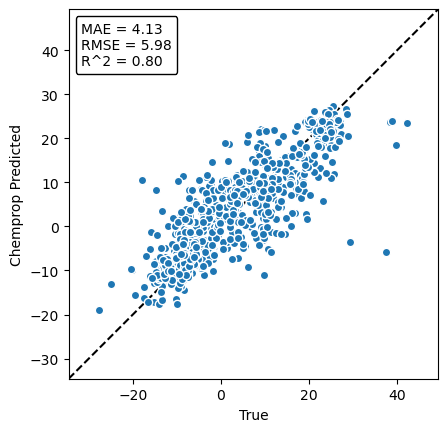

In [4]:
def plot_parity(y_true, y_pred, y_pred_unc=None):
    axmin = min(min(y_true), min(y_pred)) - 0.1 * (max(y_true) - min(y_true))
    axmax = max(max(y_true), max(y_pred)) + 0.1 * (max(y_true) - min(y_true))

    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    plt.plot([axmin, axmax], [axmin, axmax], "--k")

    plt.errorbar(
        y_true,
        y_pred,
        yerr=y_pred_unc,
        linewidth=0,
        marker="o",
        markeredgecolor="w",
        alpha=1,
        elinewidth=1,
    )

    plt.xlim((axmin, axmax))
    plt.ylim((axmin, axmax))

    ax = plt.gca()
    ax.set_aspect("equal")

    at = AnchoredText(
        f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}\nR^2 = {r2:.2f}",
        prop=dict(size=10),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)

    plt.xlabel("True")
    plt.ylabel("Chemprop Predicted")

    plt.show()

    return


arguments = [
    "--test_path",
    "./hydro_test.csv",
    "--preds_path",
    "test_preds_reaction.csv",
    "--checkpoint_dir",
    "default_chemprop",
]


args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)
df = pd.read_csv("./hydro_test.csv")
df["preds"] = [x[0] for x in preds]
plot_parity(df.ea, df.preds)

Loading training args
Setting molecule featurization parameters to default.
Loading data


938it [00:00, 443496.47it/s]
100%|██████████| 938/938 [00:00<00:00, 534691.11it/s]


Validating SMILES
Test size = 938


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Moving model to cuda


100%|██████████| 1/1 [00:04<00:00,  4.96s/it]

Saving predictions to test_preds_reaction.csv
Elapsed time = 0:00:05


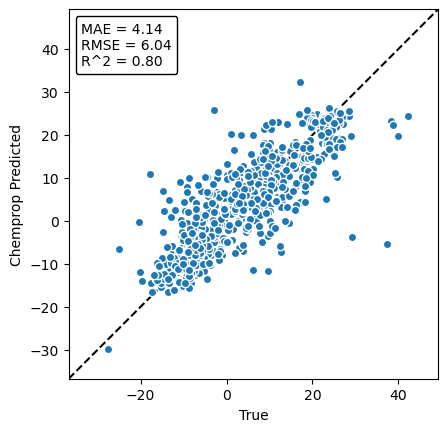

In [5]:
arguments = [
    "--test_path",
    "./hydro_test.csv",
    "--preds_path",
    "test_preds_reaction.csv",
    "--checkpoint_dir",
    "best_bayes_chemprop",
]


args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)
df = pd.read_csv("./hydro_test.csv")
df["preds"] = [x[0] for x in preds]

plot_parity(df.ea, df.preds)

In [12]:
# save df with preds
# add column with reactant smiles
# add column with product smiles
# add column with functional group
df["reactant_smi"] = reactant_smi_test
df["product_smi"] = product_smi_test
df["functional_group"] = function_group_list_test
#df.to_csv("test_preds_chemprop.csv", index=False)

In [12]:
import pandas as pd
import numpy as np 

In [13]:
df=pd.read_csv("test_preds_reaction.csv")
df_test = pd.read_csv("hydro_test_alchemy.csv")

In [20]:
dict_stats = {}
resid = np.array(df["ea"].tolist()) - np.array(df_test["ea"].tolist())

In [22]:
print("MAE Test: {}".format(np.mean(np.abs(resid))))

MAE Test: 2.878288359868468


In [25]:
print("RMSE Test: {}".format(np.mean(resid**2)**(0.5)))

RMSE Test: 5.812818778790502


In [29]:
print("R2 Test: {}".format(np.corrcoef(df["ea"].tolist(), df_test["ea"].tolist())[0,1]**2))

R2 Test: 0.8271134371014942
